<a href="https://colab.research.google.com/github/DSGP-Group-1-EAPS/SL-Apparel-Dataset/blob/Ranidu-Gurusinghe/Essembling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
!pip install scikit-learn==1.4.1.post1
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import timedelta
import numpy as np
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 43.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.1 MB/s eta 0:00:00


In [ ]:
import lightgbm as lgb
print(lgb.__version__)

4.1.0


In [ ]:
# Mounting the Google Drive
drive.mount('/content/drive')

sept_testing_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/sept_train_test.xlsx')

Mounted at /content/drive


In [ ]:
import pickle

In [ ]:
def ts_load_model(model_path):
    with open(model_path, 'rb') as file:
        return pickle.load(file)

In [ ]:
random_forest_model = ts_load_model(
   '/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Models/rf_model_original.pkl')


catboost_model = ts_load_model(
    '/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Models/Catboost_model_original.pkl')


lightgbm_model = ts_load_model(
    '/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Models/LightGBM_model_original.pkl')

In [ ]:
retraining_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/DSGP_COURSEWORK/SL Apparel Dataset model/Dataset/retraining_dataset.xlsx')

In [ ]:
features  = ['Encoded Code', 'Encoded Department', 'YearsWorked', 'DayOfWeek',
             'LeaveMonth', 'LeaveYear', 'Encoded Reason','Encoded Status',
             'Encoded Absenteeism Type', 'Encoded Shift', 'MonthlyDeptTotal']

In [ ]:
X_retrain = retraining_df[features]
Y_retrain = retraining_df['TargetCategory']

In [ ]:
X_test = sept_testing_df[features]
Y_test = sept_testing_df['TargetCategory']

In [ ]:
X_retrain.tail()

,Encoded Code,Encoded Department,YearsWorked,DayOfWeek,LeaveMonth,LeaveYear,Encoded Reason,Encoded Status,Encoded Absenteeism Type,Encoded Shift,MonthlyDeptTotal
85085,3577,2,1,4,8,2023,11,0,2,1,852
85086,3595,2,1,4,8,2023,14,0,2,2,852
85087,3426,2,2,4,8,2023,11,0,2,1,852
85088,4126,2,0,4,8,2023,8,0,2,1,852
85089,2155,2,9,4,8,2023,14,0,2,1,852


In [ ]:
random_forest_model.fit(X_retrain, Y_retrain)
catboost_model.fit(X_retrain, Y_retrain)
lightgbm_model.fit(X_retrain, Y_retrain)

0:	learn: 0.6726935	total: 67.3ms	remaining: 1m 7s
1:	learn: 0.6532458	total: 86.3ms	remaining: 43.1s
2:	learn: 0.6388320	total: 107ms	remaining: 35.4s
3:	learn: 0.6275561	total: 129ms	remaining: 32.1s
4:	learn: 0.6177327	total: 147ms	remaining: 29.2s
5:	learn: 0.6093838	total: 166ms	remaining: 27.4s
6:	learn: 0.6033804	total: 183ms	remaining: 25.9s
7:	learn: 0.5975932	total: 202ms	remaining: 25s
8:	learn: 0.5933104	total: 220ms	remaining: 24.2s
9:	learn: 0.5881037	total: 238ms	remaining: 23.6s
10:	learn: 0.5845930	total: 258ms	remaining: 23.2s
11:	learn: 0.5803905	total: 282ms	remaining: 23.2s
12:	learn: 0.5765755	total: 303ms	remaining: 23s
13:	learn: 0.5733653	total: 321ms	remaining: 22.6s
14:	learn: 0.5704472	total: 340ms	remaining: 22.3s
15:	learn: 0.5679887	total: 359ms	remaining: 22.1s
16:	learn: 0.5657541	total: 378ms	remaining: 21.9s
17:	learn: 0.5633949	total: 398ms	remaining: 21.7s
18:	learn: 0.5618381	total: 418ms	remaining: 21.6s
19:	learn: 0.5600624	total: 437ms	remaining

LGBMClassifier(learning_rate=0.05, max_depth=6, metric='logloss', num_leaves=39)

In [ ]:
X_test.head()

,Encoded Code,Encoded Department,YearsWorked,DayOfWeek,LeaveMonth,LeaveYear,Encoded Reason,Encoded Status,Encoded Absenteeism Type,Encoded Shift,MonthlyDeptTotal
0,365,2,24,5,9,2023,15,1,0,1,1003
1,2278,1,14,5,9,2023,10,1,0,1,133
2,393,1,13,5,9,2023,10,1,0,1,133
3,4102,1,1,5,9,2023,10,1,0,1,133
4,1442,2,9,5,9,2023,10,1,0,1,1003


In [ ]:
rf_pred = random_forest_model.predict(X_test)

In [ ]:
cb_pred = catboost_model.predict(X_test)

In [ ]:
lgbm_pred = lightgbm_model.predict(X_test)

In [ ]:
rf_pred_proba = random_forest_model.predict_proba(X_test)
cb_pred_proba = catboost_model.predict_proba(X_test)
lgbm_pred_proba = lightgbm_model.predict_proba(X_test)



In [ ]:
# Create a DataFrame with predictions from each model and their probabilities
predictions_df = pd.DataFrame({
    'Employee Code': X_test['Encoded Code'],
    'Department': X_test['Encoded Department'],
    'RF_Pred': rf_pred,
    'RF_Proba': rf_pred_proba.max(axis=1),  # Taking the maximum probability across all classes
    'CatBoost_Pred': cb_pred,
    'CatBoost_Proba': cb_pred_proba.max(axis=1),  # Taking the maximum probability across all classes
    'LGBM_Pred': lgbm_pred,
    'LGBM_Proba': lgbm_pred_proba.max(axis=1)  # Taking the maximum probability across all classes
})

# Determine the majority vote for each row
predictions_df['Majority_Vote'] = predictions_df.mode(axis=1)[0]

# Calculate the mean probability for each majority vote
mean_proba = []
for index, row in predictions_df.iterrows():
    proba_sum = 0
    count = 0
    for model in ['RF', 'CatBoost', 'LGBM']:
        if row[model + '_Pred'] == row['Majority_Vote']:
            proba_sum += row[model + '_Proba']
            count += 1
    mean_proba.append(proba_sum / count if count > 0 else 0)

# Add the mean probability column to the predictions DataFrame
predictions_df['Mean_Proba'] = mean_proba


In [ ]:
predictions_df['Actual'] = Y_test

In [ ]:
predictions_df.head()

,Employee Code,Department,RF_Pred,RF_Proba,CatBoost_Pred,CatBoost_Proba,LGBM_Pred,LGBM_Proba,Majority_Vote,Mean_Proba,Actual
0,365,2,A,0.716061,A,0.796016,A,0.854397,A,0.788824,A
1,2278,1,B,0.770038,B,0.927974,B,0.786600,B,0.828204,B
2,393,1,B,0.674596,B,0.678040,B,0.738042,B,0.696893,B
3,4102,1,B,0.805422,B,0.891947,B,0.850463,B,0.849277,B
4,1442,2,B,0.615684,B,0.741515,B,0.693924,B,0.683708,B


In [ ]:
predictions_df.tail()

,Employee Code,Department,RF_Pred,RF_Proba,CatBoost_Pred,CatBoost_Proba,LGBM_Pred,LGBM_Proba,Majority_Vote,Mean_Proba,Actual
2312,4250,2,A,0.840168,A,0.980059,A,0.898659,A,0.906295,B
2313,4278,2,A,0.847155,A,0.992956,A,0.912131,A,0.917414,A
2314,3950,2,A,0.835633,A,0.951991,A,0.836633,A,0.874752,A
2315,1143,2,A,0.891312,A,0.853910,A,0.844936,A,0.863386,A
2316,3922,2,A,0.816026,A,0.864795,A,0.795281,A,0.825368,B


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy of the majority vote predictions against Y_test
accuracy_majority_vote = accuracy_score(Y_test, predictions_df['Majority_Vote'])
print("Majority Vote Accuracy:", accuracy_majority_vote)

Majority Vote Accuracy: 0.8006042296072508


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(Y_test, predictions_df['Majority_Vote'])

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           A       0.78      0.94      0.85      1439
           B       0.85      0.57      0.68       878

    accuracy                           0.80      2317
   macro avg       0.82      0.76      0.77      2317
weighted avg       0.81      0.80      0.79      2317



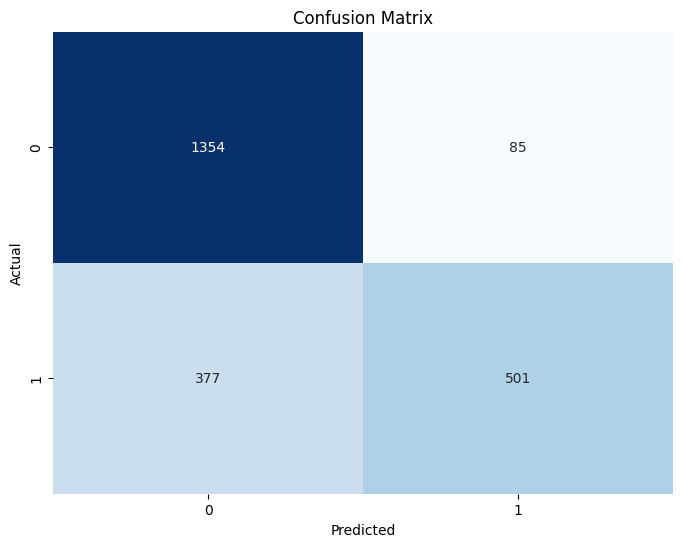

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(Y_test,predictions_df['Majority_Vote'])
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

filtered_df = predictions_df[(predictions_df['Majority_Vote'] == 'B') & (predictions_df['Actual'] == 'A')]

# Drop duplicate rows based on the 'Employee_Code' column to keep only unique employee codes
filtered_df_unique = filtered_df.drop_duplicates(subset=['Employee Code'])

# Display the filtered DataFrame with unique employee codes
print(filtered_df_unique)

# Print the number of rows in the filtered DataFrame with unique employee codes
print("Number of rows in filtered DataFrame with unique employee codes:", filtered_df_unique.shape[0])


      Employee Code  Department RF_Pred  RF_Proba CatBoost_Pred  \
11             1276           1       B  0.555475             B   
18             2818           1       B  0.840858             B   
38             1131           1       A  0.512498             B   
49              194           1       B  0.791572             B   
53             2423           1       B  0.805207             B   
56             3890           1       B  0.862098             B   
63             2830           1       B  0.738584             B   
121            2420           2       B  0.500776             B   
186            1387           2       B  0.631734             B   
272            1593           2       B  0.638672             B   
302            3210           2       A  0.511665             B   
558            3244           2       B  0.502626             A   
631            2976           2       B  0.668935             B   
692            3003           2       B  0.674488             

In [ ]:
tp = 30
fp = 20
precision = tp/(tp+fp)
print(precision)

0.6
